<a href="https://colab.research.google.com/github/duressaJemal/Computer-Vision/blob/main/Computer_vision_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Very Deep Convolutional Network(VGGNet)**

PREPARED BY:

1. DURESA JEMAL DEKEBO			  UGR/3937/12
2. ELSAI DERIBU SHUMI			    UGR/0066/12
3. ENDALE YOHANNES LARORO			UGR/7379/12
4. EPHREM ALEMAYEHU LEMMA			UGR/4365/12

---


# **Background: Very Deep Convolutional Networks (VGGNet)**


*   VGGNet, or Very Deep Convolutional Networks, was proposed by Karen Simonyan
    and Andrew Zisserman in 2014. It achieved remarkable performance on the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) 2014, which is a benchmark dataset for object recognition tasks.

    \

*   VGGNet was built upon the success of previous convolutional neural network  
    (CNN) architectures, particularly the AlexNet. AlexNet introduced the concept of using deep convolutional neural networks for image classification tasks and demonstrated the benefits of large-scale convolutional networks. However, AlexNet used a relatively smaller network depth compared to VGGNet.

    \
     

*   VGGNet aimed to explore the impact of increased network depth on image  
    classification tasks. By increasing the depth of the network, VGGNet sought to investigate whether the performance could be further improved. It also aimed to understand the role of network depth in capturing increasingly complex visual patterns and features.


\


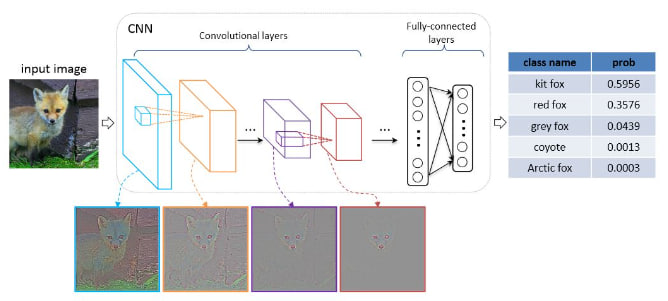






# VGGNet Architecture:

- **Network Depth:**  VGGNet is known for its depth, with 16-19 layers in total.
The increased depth enables the network to learn more complex features and capture detailed information from input images. By having a deeper network, VGGNet can potentially capture more abstract and high-level representations compared to its predecessor, AlexNet.

\



- **Convolutional Layers:** VGGNet employed a homogeneous architecture, using 3x3 convolutional filters with a stride of 1 pixel and a padding of 1 pixel throughout the network. By using small filters and the same padding, VGGNet ensures that the spatial resolution of the feature maps remains the same after each convolutional layer. This structure allows the network to learn more localized and detailed features.

\

- **Max Pooling Layers**: VGGNet utilized max-pooling layers with a 2x2 filter and a stride of 2 pixels. Max pooling reduces the spatial dimensions of the feature maps while retaining the most important features. It helps in capturing the hierarchical structure of the input and providing translation invariance. The use of max pooling was similar to AlexNet.

\

- **Fully Connected Layers:** The last few layers of VGGNet are fully connected layers. These layers take the output of the convolutional layers and produce the final class probabilities. VGGNet typically ends with three fully connected layers, followed by a softmax activation function to obtain class probabilities. The fully connected layers in VGGNet were similar to those in AlexNet.

\

- **Architecture Configurations:** VGGNet has several configurations, such as VGG16 and VGG19, based on the number of layers. VGG16 consists of 13 convolutional layers and three fully connected layers, while VGG19 has 16 convolutional layers and three fully connected layers. These configurations with increased depth demonstrated improved performance on the ImageNet dataset compared to its predecessor.

\

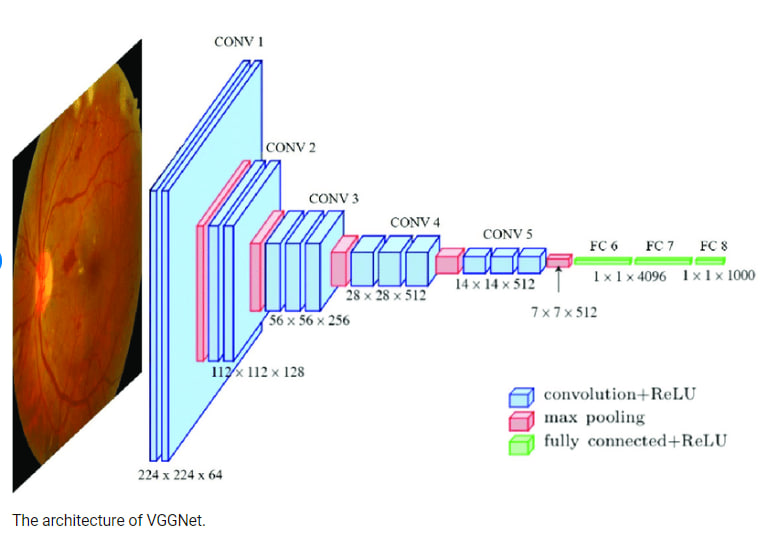

\
*   The key differences between VGGNet and its predecessor, AlexNet, lie in the increased network depth and the use of homogeneous smaller filters (3x3) throughout the network. These modifications in VGGNet allowed for better feature extraction and improved performance on various computer vision tasks.

\

*   In conclusion, VGGNet has made significant contributions to the field of computer vision. By introducing a very deep architecture and utilizing homogeneous convolutional layers, VGGNet has demonstrated the importance of network depth in capturing intricate visual patterns and features. Its remarkable performance on the ImageNet dataset has established VGGNet as a benchmark for image classification tasks. Moreover, VGGNet's influence can be seen in subsequent deep learning models, shaping the development of computer vision algorithms. With its advancements, VGGNet has propelled the field forward and continues to inspire further innovations in object recognition and other computer vision applications.








In [6]:
# import the necessary packages
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



## **Loading our Data**

There are built in datasets from ```tensorflow.keras.datasets``` to load our data. We use the ```cifar10.load_data()``` function.

Returns: **2 tuples**
- x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
- y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).

- More info on available datases at https://keras.io/datasets/

In [7]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
data_set = tf.keras.datasets.cifar10.load_data()
((trainX, trainY), (testX, testY)) = data_set
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
print("Completed")

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 6s 0us/step
Completed


## **Inspecting our dataset**

In [8]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(trainX.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(trainX)))
print ("Number of labels in our training data: " + str(len(trainY)))
print ("Number of samples in our test data: " + str(len(testX)))
print ("Number of labels in our test data: " + str(len(testY)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(trainX[0].shape))
print ("Labels in x_train:" + str(trainY.shape))
print("\n")
print ("Dimensions of x_test:" + str(testX[0].shape))
print ("Labels in y_test:" + str(testY.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)


Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


## **Visualizing our image dataset**

Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

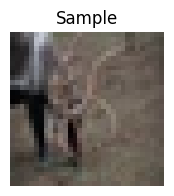

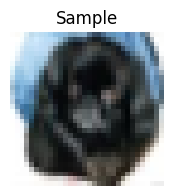

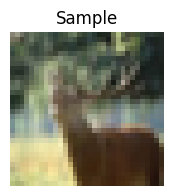

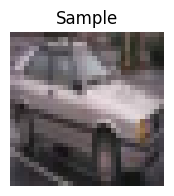

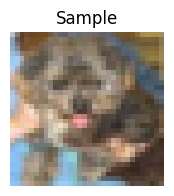

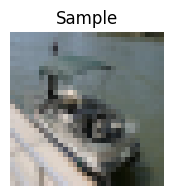

In [9]:
# Using OpenCV
# import opencv and numpy
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image=None, size=6):
    if image is not None:
        plt.figure(figsize=(size, size))
        plt.imshow(image, interpolation='nearest')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print("Image not found")


# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(trainX))
    img = trainX[random_num]
    imshow("Sample", img, size = 2)

## **Building Our Model**

- SmallVGGNetTF is a convolutional neural network architecture.
- It consists of two sets of convolutional layers followed by max-pooling and dropout.
- The first set has two convolutional layers with 32 filters each, followed by max-pooling and dropout.
- The second set has two convolutional layers with 64 filters each, followed by max-pooling and dropout.
- After flattening, there's a fully connected layer with 512 units, followed by dropout.
- The output layer is a softmax classifier with classes units for classification.

In [10]:
class SmallVGGNetTF:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the input shape and channel dimension, assuming
		# TensorFlow/channels-last ordering
		inputShape = (height, width, depth)
		chanDim = -1

		# define the model input
		inputs = tf.keras.layers.Input(shape=inputShape)

		# first (CONV => RELU) * 2 => POOL layer set
		x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(inputs)
		x = tf.keras.layers.Activation("relu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("relu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
		x = tf.keras.layers.Dropout(0.25)(x)

		# second (CONV => RELU) * 2 => POOL layer set
		x = tf.keras.layers.Conv2D(64, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("relu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.Conv2D(64, (3, 3), padding="same")(x)
		x = tf.keras.layers.Activation("relu")(x)
		x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
		x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
		x = tf.keras.layers.Dropout(0.25)(x)

		# set of FC => RELU layers
		x = tf.keras.layers.Flatten()(x)
		x = tf.keras.layers.Dense(512)(x)
		x = tf.keras.layers.Activation("relu")(x)
		x = tf.keras.layers.BatchNormalization()(x)
		x = tf.keras.layers.Dropout(0.5)(x)

		# softmax classifier
		x = tf.keras.layers.Dense(classes)(x)
		x = tf.keras.layers.Activation("softmax")(x)

		# create the model
		model = tf.keras.models.Model(inputs, x, name="smallvggnet_tf")

		# return the constructed network architecture
		return model

## **Training our Model**
- Our preprocessed data is used as the input
- We set the batch size to 32 (or any number ranging from 8 to 256 is good)
- We set the number of epochs to 28, this is just for this tutorial purpose, but a value for at least 10 should be used
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's final performance. Here we are examing Test Loss and Test Accuracy

In [12]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

# initialize the learning rate, total number of epochs to train for, and batch size
INIT_LR = 0.01
EPOCHS = 28
BS = 32


In [13]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = tf.keras.optimizers.legacy.SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model = SmallVGGNetTF.build(width=32, height=32, depth=3,
	classes=len(labelNames))
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
print(model.summary())




[INFO] compiling model...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "smallvggnet_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                    

In [14]:
# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=BS, epochs=EPOCHS, verbose=1)

[INFO] training network for 28 epochs...
Epoch 1/28
1563/1563 [==============================] - 210s 134ms/step - loss: 1.7837 - accuracy: 0.4041 - val_loss: 1.3669 - val_accuracy: 0.5099
Epoch 2/28
1563/1563 [==============================] - 206s 132ms/step - loss: 1.3012 - accuracy: 0.5384 - val_loss: 1.1428 - val_accuracy: 0.5894
Epoch 3/28
1563/1563 [==============================] - 207s 132ms/step - loss: 1.1726 - accuracy: 0.5814 - val_loss: 1.0462 - val_accuracy: 0.6284
Epoch 4/28
1563/1563 [==============================] - 208s 133ms/step - loss: 1.0971 - accuracy: 0.6078 - val_loss: 0.9746 - val_accuracy: 0.6510
Epoch 5/28
1563/1563 [==============================] - 207s 133ms/step - loss: 1.0490 - accuracy: 0.6295 - val_loss: 1.0199 - val_accuracy: 0.6416
Epoch 6/28
1563/1563 [==============================] - 206s 132ms/step - loss: 1.0056 - accuracy: 0.6457 - val_loss: 0.9820 - val_accuracy: 0.6536
Epoch 7/28
1563/1563 [==============================] - 204s 130ms/step

##**Evaluation**

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 11s 33ms/step
              precision    recall  f1-score   support

    airplane       0.85      0.61      0.71      1000
  automobile       0.91      0.79      0.85      1000
        bird       0.68      0.57      0.62      1000
         cat       0.53      0.55      0.54      1000
        deer       0.60      0.74      0.66      1000
         dog       0.64      0.62      0.63      1000
        frog       0.64      0.92      0.75      1000
       horse       0.89      0.68      0.77      1000
        ship       0.81      0.89      0.84      1000
       truck       0.81      0.84      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



##**Ploting our Loss and Accuracy Charts**




In [16]:
history_dict = H.history
history_dict

{'loss': [1.7836942672729492,
  1.3011795282363892,
  1.1725611686706543,
  1.0970927476882935,
  1.0489581823349,
  1.0055601596832275,
  0.9782576560974121,
  0.9515674710273743,
  0.9278628826141357,
  0.9107174277305603,
  0.9029268622398376,
  0.8895041942596436,
  0.87849360704422,
  0.8640445470809937,
  0.853009045124054,
  0.8485060334205627,
  0.8431445360183716,
  0.8347308039665222,
  0.8286099433898926,
  0.8274484276771545,
  0.816258430480957,
  0.8105477094650269,
  0.8051910996437073,
  0.8037571907043457,
  0.7998542785644531,
  0.7937851548194885,
  0.7928028106689453,
  0.7854467034339905],
 'accuracy': [0.40408000349998474,
  0.5384399890899658,
  0.5814399719238281,
  0.6078400015830994,
  0.6295400261878967,
  0.6456800103187561,
  0.6555399894714355,
  0.6615999937057495,
  0.67221999168396,
  0.6769199967384338,
  0.6832600235939026,
  0.6892399787902832,
  0.6891000270843506,
  0.6950600147247314,
  0.6996600031852722,
  0.7020800113677979,
  0.705380022525787

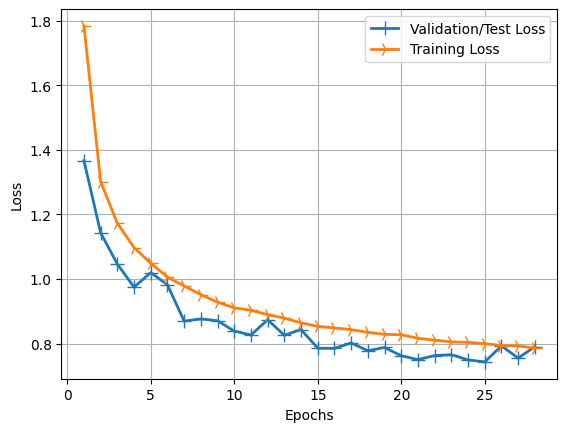

In [17]:
# Plotting our loss charts

# Use the History object we created to get our saved performance results
history_dict = H.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

#### **Our Accuracy Charts**

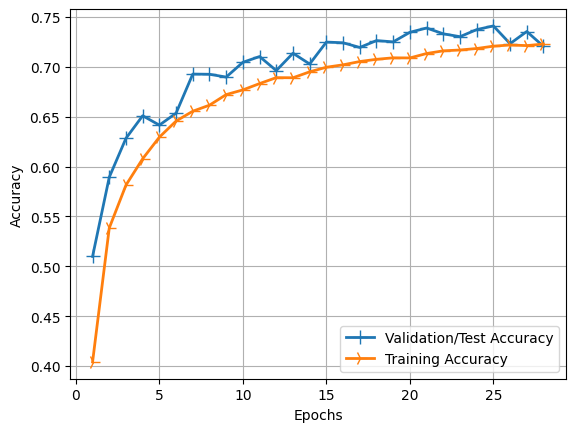

In [18]:
# Plotting our accuracy charts

history_dict = H.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **Saving and Loadng our Model**

**Saving our Model is simple, just use:**

 ```model.save("model_file_name.h5")```

In [19]:
model.save("cifar10_cnn_28_Epochs.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# We need to import our load_model function
classifier = tf.keras.models.load_model('cifar10_cnn_28_Epochs.h5')

##  **9. Getting Predictions from our sample Test Data**

**Predicting all test data**

In [21]:
#x_test = x_test.reshape(10000,28,28,1)
print(testX.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(testX), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 32, 32, 3)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 10s 33ms/step
Completed.

[3 8 8 ... 5 4 7]
<class 'numpy.ndarray'>
10000


**Predicting an individual test image**

In [22]:
# Get the first image by index 0 of x_test and show it's shape
input_im = testX[0]
print(input_im.shape)

# Add a 4th dimension to indicate batch size of 1
input_im = np.expand_dims(input_im, axis=0)
print(input_im.shape)

# We now get the predictions for that single image
pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 22ms/step
[3]
<class 'numpy.ndarray'>
1


### **Let's put the predicted label on an image with the test data image**

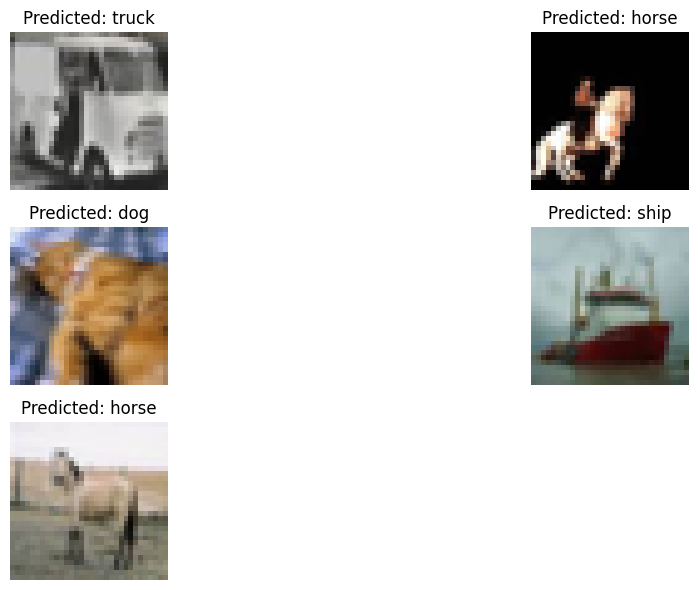

In [23]:
num_images_to_display = 5
selected_indices = np.random.choice(len(testX), num_images_to_display, replace=False)
selected_images = testX[selected_indices]
selected_predictions = predictions[selected_indices]

num_cols = 2
num_rows = (num_images_to_display + num_cols - 1) // num_cols # Calculate the number of columns


plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(selected_images[i])
    plt.axis('off')
    predicted_class = labelNames[selected_predictions[i].argmax()]
    plt.title(f"Predicted: {predicted_class}")

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()